## A DATA ANALYSIS PROJECT WITH PANDAS AND PRINCIPAL COMPONENT ANALYSIS(PCA)

The pandas library will predominantly used for this analysis with numpy, matplotlib libraries inclusive.

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline

Creating new DataFrame. A data frame is like a two-dimensional series.

In [2]:
inventory = {
    'First_Name': ['Kennedy', 'Marylyn', 'Jeffery', 'Heather', 'Benedith', 'Elizabeth'],
    'Last_Name': ['Peterson', 'Jones', 'Christensen', 'Julian', 'Anderweild', 'Jordan'],
    'Sex': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Item_bought': ['TV set', 'Dress', 'Smartphone', 'Missing', 'Book', 'Na'],
    'Age': ['42', '33', '27', 'Na', '38', 'Missing'],
    'Email': ['kenpetrson@gmail.com', 'maryjones@gmail.com', 'christenjef@gmail.com', 'Na', 'Na', 'lizzyjord@gmail.com']
}

dt = pd.DataFrame(inventory)

In [3]:
dt

,First_Name,Last_Name,Sex,Item_bought,Age,Email
0,Kennedy,Peterson,Male,TV set,42,kenpetrson@gmail.com
1,Marylyn,Jones,Female,Dress,33,maryjones@gmail.com
2,Jeffery,Christensen,Male,Smartphone,27,christenjef@gmail.com
3,Heather,Julian,Female,Missing,Na,Na
4,Benedith,Anderweild,Male,Book,38,Na
5,Elizabeth,Jordan,Female,Na,Missing,lizzyjord@gmail.com


In [4]:
dt.replace('Na', np.nan, inplace=True)
dt.replace('Missing', np.nan, inplace=True) #inplace function make the changes to reflect on the data frame 
dt

,First_Name,Last_Name,Sex,Item_bought,Age,Email
0,Kennedy,Peterson,Male,TV set,42,kenpetrson@gmail.com
1,Marylyn,Jones,Female,Dress,33,maryjones@gmail.com
2,Jeffery,Christensen,Male,Smartphone,27,christenjef@gmail.com
3,Heather,Julian,Female,NaN,NaN,NaN
4,Benedith,Anderweild,Male,Book,38,NaN
5,Elizabeth,Jordan,Female,NaN,NaN,lizzyjord@gmail.com


In [5]:
dt.fillna('-') #replaces null values with dash ('-')

,First_Name,Last_Name,Sex,Item_bought,Age,Email
0,Kennedy,Peterson,Male,TV set,42,kenpetrson@gmail.com
1,Marylyn,Jones,Female,Dress,33,maryjones@gmail.com
2,Jeffery,Christensen,Male,Smartphone,27,christenjef@gmail.com
3,Heather,Julian,Female,-,-,-
4,Benedith,Anderweild,Male,Book,38,-
5,Elizabeth,Jordan,Female,-,-,lizzyjord@gmail.com


In [6]:
dt.dropna(axis='index', how='any') #drops rows with any missing or null entry

,First_Name,Last_Name,Sex,Item_bought,Age,Email
0,Kennedy,Peterson,Male,TV set,42,kenpetrson@gmail.com
1,Marylyn,Jones,Female,Dress,33,maryjones@gmail.com
2,Jeffery,Christensen,Male,Smartphone,27,christenjef@gmail.com


In [7]:
dt.drop(index=5)

,First_Name,Last_Name,Sex,Item_bought,Age,Email
0,Kennedy,Peterson,Male,TV set,42,kenpetrson@gmail.com
1,Marylyn,Jones,Female,Dress,33,maryjones@gmail.com
2,Jeffery,Christensen,Male,Smartphone,27,christenjef@gmail.com
3,Heather,Julian,Female,NaN,NaN,NaN
4,Benedith,Anderweild,Male,Book,38,NaN


In [8]:
dt.loc[1] #returns the row at index 1

First_Name                 Marylyn
Last_Name                    Jones
Sex                         Female
Item_bought                  Dress
Age                             33
Email          maryjones@gmail.com
Name: 1, dtype: object

In [9]:
dt.iloc[3] #returns the column at index 3

First_Name     Heather
Last_Name       Julian
Sex             Female
Item_bought        NaN
Age                NaN
Email              NaN
Name: 3, dtype: object

In [10]:
dt.iloc[2,1:4] #slicing can be performed on columns as well

Last_Name      Christensen
Sex                   Male
Item_bought     Smartphone
Name: 2, dtype: object

In [11]:
dt.dtypes #dtypes returns the data type of entries in a data frame

First_Name     object
Last_Name      object
Sex            object
Item_bought    object
Age            object
Email          object
dtype: object

In [13]:
dt['Age'] = dt['Age'].astype(float) #converts string data type to float
dt.dtypes

First_Name      object
Last_Name       object
Sex             object
Item_bought     object
Age            float64
Email           object
dtype: object

In [14]:
dt['Age'].mean()

35.0

In [16]:
df = pd.DataFrame(np.random.randn(7,5)) # note the size: 6 rows, 4 columns
df

,0,1,2,3,4
0,2.028947,1.152390,0.015977,-0.089885,0.865230
1,-0.989680,0.095910,-0.351155,-0.161642,0.570557
2,1.275300,1.314222,-0.351824,-2.197297,-1.803839
3,0.850241,-0.745486,-1.126208,-0.322958,-0.274045
4,0.323411,2.398871,2.733860,0.556235,-0.286711
5,-1.033208,0.389302,0.616617,0.329970,-1.731643
6,0.320439,0.478192,0.501933,0.688340,1.248038


You can pass in an index during construction, likewise column names:

In [15]:
df = pd.DataFrame(np.random.randn(5,4), 
                  index=["Row {}".format(i) for i in range(5)],
                  columns=['Col {}'.format(i) for i in range(4)])
df

,Col 0,Col 1,Col 2,Col 3
Row 0,0.612568,0.577222,0.895351,-0.241707
Row 1,-0.688792,0.136671,-0.608039,-0.095192
Row 2,-0.434437,-0.115549,1.325801,1.525100
Row 3,-0.122450,-1.067990,2.479108,-1.276999
Row 4,-0.251208,-0.023421,1.125472,1.068137


You can also construct it from a dictionary:

In [7]:
columns = {'first': np.random.randn(6),
           'second': np.random.randn(6),
           'third': np.random.randn(6),
           'fourth': np.random.randn(6)}
df = pd.DataFrame(columns, index=["row {}".format(i) for i in range(6)])
df

,first,second,third,fourth
row 0,-0.590589,0.334875,-0.669308,-0.388656
row 1,0.190491,0.464777,-2.697198,-1.762267
row 2,-1.169817,-1.038915,-0.344424,0.678181
row 3,-0.150367,-0.331338,0.959427,-0.257361
row 4,-0.295471,0.358641,1.161541,-1.056959
row 5,-0.579307,1.380065,-0.008585,-0.060166


# Data Frame Addressing

We can now address parts of the data by their row and column names.

In [9]:
df['first']

row 0   -0.590589
row 1    0.190491
row 2   -1.169817
row 3   -0.150367
row 4   -0.295471
row 5   -0.579307
Name: first, dtype: float64

In [18]:
df.loc['row 1'] 

first    -1.555784
second   -1.027056
third    -0.828232
fourth    0.788986
Name: row 1, dtype: float64

In [19]:
a = np.array([10, 20, 30])
a

array([10, 20, 30])

In [20]:
a = np.linspace(2, 10, 5) # from 2 to 10 with 5 elements
a

array([ 2.,  4.,  6.,  8., 10.])

In [22]:
a = np.random.randint(10, size=6)
a

array([6, 1, 8, 6, 1, 3])

# Advanced Data frames

The pandas library in python can be used for all kinds of file format. A data frame can hold all sorts of data types at the same time.

To read a file in pandas, you will provide the file path of the file. Wrong file path will produce an error.
Note, the file extension must correspond with the read function i.e. pd.read_csv('file.csv'). Otherwise, will produce error.

In [55]:
file = pd.read_csv(r'C:/Users/MY-PC/Documents/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')

In [24]:
file.head(5) #The head() returns the first rows of the data set depending on the preset argument.

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,True,me,POINT (-73.9570437717691 40.794850940803904)
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581)
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755)
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,...,True,False,False,False,False,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163)


The set_index() method is used to set the index of the data set

In [25]:
file.set_index('Date')

,X,Y,Unique Squirrel ID,Hectare,Shift,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,Combination of Primary and Highlight Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
Date,,,,,,,,,,,,,,,,,,,,,
10142018,-73.956134,40.794082,37F-PM-1014-03,37F,PM,3,NaN,NaN,NaN,+,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
10062018,-73.957044,40.794851,37E-PM-1006-03,37E,PM,3,Adult,Gray,Cinnamon,Gray+Cinnamon,...,False,False,False,False,False,False,False,True,me,POINT (-73.9570437717691 40.794850940803904)
10102018,-73.976831,40.766718,2E-AM-1010-03,02E,AM,3,Adult,Cinnamon,NaN,Cinnamon+,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581)
10182018,-73.975725,40.769703,5D-PM-1018-05,05D,PM,5,Juvenile,Gray,NaN,Gray+,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755)
10182018,-73.959313,40.797533,39B-AM-1018-01,39B,AM,1,NaN,NaN,NaN,+,...,True,False,False,False,False,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10072018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,4,Adult,Gray,NaN,Gray+,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466)
10132018,-73.970402,40.782560,19A-PM-1013-05,19A,PM,5,Adult,Gray,White,Gray+White,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973)
10122018,-73.966587,40.783678,22D-PM-1012-07,22D,PM,7,Adult,Gray,"Black, Cinnamon, White","Gray+Black, Cinnamon, White",...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883)


The info() function gives you an overview of the data types

In [26]:
file.info

<bound method DataFrame.info of               X          Y Unique Squirrel ID Hectare Shift      Date  \
0    -73.956134  40.794082     37F-PM-1014-03     37F    PM  10142018   
1    -73.957044  40.794851     37E-PM-1006-03     37E    PM  10062018   
2    -73.976831  40.766718      2E-AM-1010-03     02E    AM  10102018   
3    -73.975725  40.769703      5D-PM-1018-05     05D    PM  10182018   
4    -73.959313  40.797533     39B-AM-1018-01     39B    AM  10182018   
...         ...        ...                ...     ...   ...       ...   
3018 -73.963943  40.790868     30B-AM-1007-04     30B    AM  10072018   
3019 -73.970402  40.782560     19A-PM-1013-05     19A    PM  10132018   
3020 -73.966587  40.783678     22D-PM-1012-07     22D    PM  10122018   
3021 -73.963994  40.789915     29B-PM-1010-02     29B    PM  10102018   
3022 -73.975479  40.769640      5E-PM-1012-01     05E    PM  10122018   

      Hectare Squirrel Number       Age Primary Fur Color  \
0                           3 

The shape method function returns the number of rows and columns in the data set.

In [27]:
file.shape

(3023, 31)

The count() method returns the total number of entries on a column.

In [28]:
file['Highlight Fur Color'].count()

1937

The value_count() method returns the total number of unique entries on a column.

In [29]:
file['Highlight Fur Color'].value_counts()

Cinnamon                  767
White                     585
Cinnamon, White           268
Gray                      170
Gray, White                59
Black                      34
Black, Cinnamon, White     32
Black, White               10
Black, Cinnamon             9
Gray, Black                 3
Name: Highlight Fur Color, dtype: int64

The normalized value_count() method returns the percentage of unique entries on a column.

In [30]:
file['Highlight Fur Color'].value_counts(normalize=True)

Cinnamon                  0.395973
White                     0.302013
Cinnamon, White           0.138358
Gray                      0.087765
Gray, White               0.030459
Black                     0.017553
Black, Cinnamon, White    0.016520
Black, White              0.005163
Black, Cinnamon           0.004646
Gray, Black               0.001549
Name: Highlight Fur Color, dtype: float64

Filtering the rows using existing filter

In [31]:
filt = file['Highlight Fur Color'] == 'Cinnamon'
file.loc[filt]

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,True,me,POINT (-73.9570437717691 40.794850940803904)
5,-73.956570,40.790256,33H-AM-1019-02,33H,AM,10192018,2,Juvenile,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9565700386162 40.7902561000937)
7,-73.960261,40.794288,35C-PM-1013-03,35C,PM,10132018,3,NaN,Gray,Cinnamon,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9602609920814 40.79428830455661)
10,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)
15,-73.972250,40.774288,11D-AM-1010-03,11D,AM,10102018,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9722500196844 40.7742879599026)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,-73.972116,40.766050,3I-PM-1013-03,03I,PM,10132018,3,Adult,Black,Cinnamon,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9721159387757 40.7660503188637)
2992,-73.957072,40.798571,40C-AM-1017-04,40C,AM,10172018,4,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9570722262693 40.7985706143519)
2994,-73.966844,40.787078,25B-PM-1007-01,25B,PM,10072018,1,NaN,Gray,Cinnamon,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9668442742942 40.7870781042595)
3007,-73.950353,40.797654,42H-PM-1014-04,42H,PM,10142018,4,Adult,Gray,Cinnamon,...,False,False,False,False,True,False,False,True,NaN,POINT (-73.9503533343658 40.7976543603953)


The groupby and get_group method are used for second degree filtering

In [32]:
filt = file.groupby(['Primary Fur Color'])
filt.get_group('Black')

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
41,-73.957956,40.795934,38C-PM-1014-09,38C,PM,10142018,9,Adult,Black,NaN,...,False,False,False,False,False,True,False,False,NaN,POINT (-73.9579564338627 40.7959337795027)
49,-73.968064,40.779250,17E-AM-1017-05,17E,AM,10172018,5,Adult,Black,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9680635070949 40.779249873647)
98,-73.971054,40.772469,10F-PM-1019-05,10F,PM,10192018,5,Adult,Black,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9710541405708 40.7724691605718)
129,-73.958166,40.799771,41A-PM-1007-06,41A,PM,10072018,6,Adult,Black,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9581655949437 40.7997708190022)
180,-73.970878,40.772474,10F-PM-1019-12,10F,PM,10192018,12,Adult,Black,White,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9708775864433 40.772473633538)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,-73.956448,40.797693,40C-PM-1006-04,40C,PM,10062018,4,Adult,Black,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9564478909357 40.7976928775417)
2973,-73.957579,40.795993,38D-AM-1017-06,38D,AM,10172018,6,Adult,Black,Cinnamon,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9575791421589 40.7959934459432)
2974,-73.959412,40.791787,33E-AM-1014-01,33E,AM,10142018,1,Adult,Black,Cinnamon,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.959412243507 40.7917871123534)
2984,-73.972116,40.766050,3I-PM-1013-03,03I,PM,10132018,3,Adult,Black,Cinnamon,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9721159387757 40.7660503188637)


In [33]:
file['Hectare Squirrel Number'].agg('median')

3.0

In [34]:
file['Hectare Squirrel Number'].agg(['std', 'mean', 'var'])

std     3.096492
mean    4.123718
var     9.588263
Name: Hectare Squirrel Number, dtype: float64

In [56]:
file['Hectare Squirrel Number'].nlargest(10)

21      23
1398    22
1321    21
465     20
523     19
2983    18
758     17
797     17
2573    17
2748    17
Name: Hectare Squirrel Number, dtype: int64

In [57]:
file.nlargest(10, 'Hectare Squirrel Number')

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
21,-73.970393,40.776503,14E-AM-1008-23,14E,AM,10082018,23,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9703925210471 40.7765032004992)
1398,-73.970443,40.776376,14E-AM-1008-22,14E,AM,10082018,22,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.970442878377 40.7763755560359)
1321,-73.970182,40.776370,14E-AM-1008-21,14E,AM,10082018,21,Adult,Gray,NaN,...,False,False,False,False,False,True,False,False,"curious,but not expecting food",POINT (-73.9701824376506 40.7763703306736)
465,-73.970309,40.776399,14E-AM-1008-20,14E,AM,10082018,20,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.970308716071 40.7763985667344)
523,-73.970173,40.776235,14E-AM-1008-19,14E,AM,10082018,19,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.970173142921 40.7762349924081)
2983,-73.970016,40.776236,14E-AM-1008-18,14E,AM,10082018,18,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9700158929437 40.7762359066591)
758,-73.969951,40.776276,14E-AM-1008-17,14E,AM,10082018,17,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.96995111812402 40.7762756593015)
797,-73.980854,40.767870,1B-AM-1012-17,01B,AM,10122018,17,Adult,Gray,"Cinnamon, White",...,False,False,False,False,False,False,True,False,NaN,POINT (-73.98085422862802 40.7678702158382)
2573,-73.978200,40.769566,4C-PM-1010-17,04C,PM,10102018,17,Adult,Cinnamon,"Gray, White",...,False,False,False,False,True,False,False,True,NaN,POINT (-73.978199543688 40.7695660563362)
2748,-73.972967,40.771185,7F-AM-1008-17,07F,AM,10082018,17,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.972967003211 40.7711848438157)


# Date formatting

In [8]:
cz = pd.read_excel(r'C:/Users/MY-PC/Documents/new file/Airplane_Crashes_and_Fatalities_Since_1908/Airplane_Crashes_and_Fatalities_Since_1908.xlsx')
cz

,Date,Time,Location,Operator,Route,Type,Fatalities
0,09/17/1908,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,1
1,1912-12-07 00:00:00,06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5
2,1913-06-08 00:00:00,-,"Victoria, British Columbia, Canada",Private,-,Curtiss seaplane,1
3,1913-09-09 00:00:00,18:30:00,Over the North Sea,Military - German Navy,-,Zeppelin L-1 (airship),14
4,10/17/1913,10:30:00,"Near Johannisthal, Germany",Military - German Navy,-,Zeppelin L-2 (airship),30
...,...,...,...,...,...,...,...
5263,05/20/2009,06:30:00,"Near Madiun, Indonesia",Military - Indonesian Air Force,Jakarta - Maduin,Lockheed C-130 Hercules,98
5264,05/26/2009,-,"Near Isiro, DemocratiRepubliCongo",Service Air,Goma - Isiro,Antonov An-26,4
5265,2009-01-06 00:00:00,00:15:00,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Rio de Janeiro - Paris,Airbus A330-203,228
5266,2009-07-06 00:00:00,08:30:00,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,1


In [9]:
cz['Date']

0                09/17/1908
1       1912-12-07 00:00:00
2       1913-06-08 00:00:00
3       1913-09-09 00:00:00
4                10/17/1913
               ...         
5263             05/20/2009
5264             05/26/2009
5265    2009-01-06 00:00:00
5266    2009-07-06 00:00:00
5267    2009-08-06 00:00:00
Name: Date, Length: 5268, dtype: object

In [10]:
cz.shape

(5268, 7)

In [18]:
cz.loc[0, 'Date'].day_name()

'Thursday'

In [19]:
cz['DayOfWeek'] = cz['Date'].dt.day_name()

In [20]:
cz

,Date,Time,Location,Operator,Route,Type,Fatalities,DayOfWeek
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,1,Thursday
1,1912-12-07,06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,Saturday
2,1913-06-08,-,"Victoria, British Columbia, Canada",Private,-,Curtiss seaplane,1,Sunday
3,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,-,Zeppelin L-1 (airship),14,Tuesday
4,1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,-,Zeppelin L-2 (airship),30,Friday
...,...,...,...,...,...,...,...,...
5263,2009-05-20,06:30:00,"Near Madiun, Indonesia",Military - Indonesian Air Force,Jakarta - Maduin,Lockheed C-130 Hercules,98,Wednesday
5264,2009-05-26,-,"Near Isiro, DemocratiRepubliCongo",Service Air,Goma - Isiro,Antonov An-26,4,Tuesday
5265,2009-01-06,00:15:00,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Rio de Janeiro - Paris,Airbus A330-203,228,Tuesday
5266,2009-07-06,08:30:00,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,1,Monday


In [21]:
cz['Date'].min()

Timestamp('1908-09-17 00:00:00')

In [22]:
cz['Date'].max()

Timestamp('2009-12-03 00:00:00')

In [ ]:
Subtracting time data will produce TimeDelta

In [23]:
cz['Date'].max() - cz['Date'].min()

Timedelta('36967 days 00:00:00')

In [24]:
filt = cz['Date'] >= '2000'
cz.loc[filt]

,Date,Time,Location,Operator,Route,Type,Fatalities,DayOfWeek
4587,2001-08-01,-,"Near Silimo, Indonesia",Military - Tentara Nasional Indonesia Navy,Timika - Jayapura,CASA 212-MP Aviocar 200,9,Wednesday
4669,2001-04-01,-,"Zheng Zou AB, China",Military - People's Liberation Army,Training,Shaanxi Yunshuji Y-8/Yunshuji Y-8,16,Sunday
4682,2000-05-04,09:30:00,"Marianna, Florida",Bankair,Opa-Locka - Marianna,Learjet 35A,3,Thursday
4683,2000-04-19,-,"Bukavu, DemocratiRepubliCongo",Kivu Air Services,-,Cessna 208B Caravan I,2,Wednesday
4689,2000-05-01,-,"Abuja, Nigeria",Skypower Express Airways,Lagos - Abuja,Embraer 110P1A Bandeirante,1,Monday
...,...,...,...,...,...,...,...,...
5263,2009-05-20,06:30:00,"Near Madiun, Indonesia",Military - Indonesian Air Force,Jakarta - Maduin,Lockheed C-130 Hercules,98,Wednesday
5264,2009-05-26,-,"Near Isiro, DemocratiRepubliCongo",Service Air,Goma - Isiro,Antonov An-26,4,Tuesday
5265,2009-01-06,00:15:00,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Rio de Janeiro - Paris,Airbus A330-203,228,Tuesday
5266,2009-07-06,08:30:00,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,1,Monday


In [26]:
filt = (cz['Date'] >= '1990') & (cz['Date'] < '2000')
cz.loc[filt]

,Date,Time,Location,Operator,Route,Type,Fatalities,DayOfWeek
2514,1991-02-22,-,"Cazombo, Angola",Fuerza Area Angolaise,-,Antonov AN-26,47,Friday
3908,1990-05-02,08:37:00,"Near Ibague, Colombia",Helicopteros Nacionales de Colombia,Bogota via Neiva - Ibague,Grumman G-159 Gulfstream I,15,Wednesday
3912,1990-02-01,13:40:00,"Java Sea, Indonesia",Pelita Air Service,Palambang and Jakarta,CASA 212 Aviocar 200,9,Thursday
3913,1990-01-13,12:56:00,"Near Pervouralsk, Russia",Aeroflot,Tyumen - Ufa,Tupolev TU-134A,27,Saturday
3914,1990-01-15,08:30:00,"Pico Blanco, Costa Rica",SANSA,San Jose - Palmar Sur,CASA 212 Aviocar 200,23,Monday
...,...,...,...,...,...,...,...,...
4684,1999-12-22,18:38:00,"Great Hallingbury, United Kingdom",Korean Air,"London, England - Milan, Italy",Boeing 747-2B5F,4,Wednesday
4685,1999-12-24,-,"Amritsar, India / Kandahar, Afghanistan",Indian Airlines,Kathmandu - New Delhi,Airbus A300B2-101,1,Friday
4686,1999-12-25,20:15:00,"Bejuma, Venezuela",Cubana de Aviacion,Havana - Valencia,Yakovlev YAK-42D,22,Saturday
4687,1999-12-25,15:02:00,"Near Simara, Nepal",Skyline Airways,Simara - Kathmandu,de Havilland Canada DHC-6 Twin Otter,10,Saturday


In [42]:
cz.set_index('Date', inplace=True)

In [43]:
cz

,Time,Location,Operator,Route,Type,Fatalities,DayOfWeek
Date,,,,,,,
1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,1,Thursday
1912-12-07,06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,Saturday
1913-06-08,-,"Victoria, British Columbia, Canada",Private,-,Curtiss seaplane,1,Sunday
1913-09-09,18:30:00,Over the North Sea,Military - German Navy,-,Zeppelin L-1 (airship),14,Tuesday
1913-10-17,10:30:00,"Near Johannisthal, Germany",Military - German Navy,-,Zeppelin L-2 (airship),30,Friday
...,...,...,...,...,...,...,...
2009-05-20,06:30:00,"Near Madiun, Indonesia",Military - Indonesian Air Force,Jakarta - Maduin,Lockheed C-130 Hercules,98,Wednesday
2009-05-26,-,"Near Isiro, DemocratiRepubliCongo",Service Air,Goma - Isiro,Antonov An-26,4,Tuesday
2009-01-06,00:15:00,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Rio de Janeiro - Paris,Airbus A330-203,228,Tuesday


In [44]:
cz['2000']

C:\Users\MY-PC\AppData\Local\Temp\ipykernel_10756\1429020670.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  cz['2000']


,Time,Location,Operator,Route,Type,Fatalities,DayOfWeek
Date,,,,,,,
2000-05-04,09:30:00,"Marianna, Florida",Bankair,Opa-Locka - Marianna,Learjet 35A,3,Thursday
2000-04-19,-,"Bukavu, DemocratiRepubliCongo",Kivu Air Services,-,Cessna 208B Caravan I,2,Wednesday
2000-05-01,-,"Abuja, Nigeria",Skypower Express Airways,Lagos - Abuja,Embraer 110P1A Bandeirante,1,Monday
2000-10-01,17:54:00,"Niederhasli, Switzerland",Crossair,ZÃ¼rich - Dresden,Saab 340B,10,Sunday
2000-01-13,12:38:00,"Off Marsa el-Brega, Libya",Avisto,Tripoli IAP - Marsa el-Brega,Shorts 360-300,22,Thursday
...,...,...,...,...,...,...,...
2000-07-11,-,"Luabo, DemocratiRepubliCongo",Malu Aviation,-,Antonov 32B,2,Tuesday
2000-09-11,01:23:00,"Fort Wayne, Indiana",Superior Aviation,"Fort Wayne, IN - Milwaukee, WI",Swearingen SA.226TC Metro II,1,Monday
2000-11-15,13:05:00,"Near Luanda, Angola",Asa Pesada,Luanda - Namibe,Antonov AN-26,57,Wednesday


In [46]:
cz['2000-01-01':'2001-02-01']

C:\Users\MY-PC\AppData\Local\Temp\ipykernel_10756\2574653826.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  cz['2000-01-01':'2001-02-01']


,Time,Location,Operator,Route,Type,Fatalities,DayOfWeek
Date,,,,,,,
2000-05-04,09:30:00,"Marianna, Florida",Bankair,Opa-Locka - Marianna,Learjet 35A,3,Thursday
2000-04-19,-,"Bukavu, DemocratiRepubliCongo",Kivu Air Services,-,Cessna 208B Caravan I,2,Wednesday
2000-05-01,-,"Abuja, Nigeria",Skypower Express Airways,Lagos - Abuja,Embraer 110P1A Bandeirante,1,Monday
2000-10-01,17:54:00,"Niederhasli, Switzerland",Crossair,ZÃ¼rich - Dresden,Saab 340B,10,Sunday
2000-01-13,12:38:00,"Off Marsa el-Brega, Libya",Avisto,Tripoli IAP - Marsa el-Brega,Shorts 360-300,22,Thursday
...,...,...,...,...,...,...,...
2001-01-25,18:15:00,"Ciudad Bolivar, Venezuela",Rutaca Airlines,Canaina - Ciudad Bolivar - Por La Mar,Douglas DC-3C (C47A-DL),24,Thursday
2001-01-27,17:37:00,"Byers, Colorado",North Bay Charter,"Broomfield, CO - Stillwater, OK",Beech King Air 200 Catpass,10,Saturday
2001-01-31,16:50:00,"El Yopal, Colombia",Lineas Aereas Suramericanas,El Yopal - Mitu,Sud Aviation SE-210 Caravelle 10R,3,Wednesday


In [2]:
df = pd.read_excel(r'C:/Users/MY-PC/Documents/new file/energy/energy.xlsx')
df

,Country,Energy_type,Year,Energy_consumption(quad Btu),Energy_production(quad Btu),GDP(Billions),Population,Energy_intensity_per_capita(MMBtu/person),Energy_intensity_by_GDP(1000 Btu/GDP),CO2_emission(MMtonnes)
0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...
55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


In [4]:
df.mean()

C:\Users\MY-PC\AppData\Local\Temp\ipykernel_18996\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Year                                          1999.500000
Energy_consumption(quad Btu)                     1.537811
Energy_production(quad Btu)                      1.532700
GDP(Billions)                                  827.144126
Population                                   62630.204775
Energy_intensity_per_capita(MMBtu/person)       71.898914
Energy_intensity_by_GDP(1000 Btu/GDP)            3.695104
CO2_emission(MMtonnes)                          78.800082
dtype: float64

In [5]:
df.var()

C:\Users\MY-PC\AppData\Local\Temp\ipykernel_18996\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Year                                         1.332524e+02
Energy_consumption(quad Btu)                 2.389064e+02
Energy_production(quad Btu)                  2.341988e+02
GDP(Billions)                                3.578077e+07
Population                                   2.081265e+11
Energy_intensity_per_capita(MMBtu/person)    1.293423e+04
Energy_intensity_by_GDP(1000 Btu/GDP)        2.107484e+01
CO2_emission(MMtonnes)                       8.140036e+05
dtype: float64

In [6]:
df.describe()

,Year,Energy_consumption(quad Btu),Energy_production(quad Btu),GDP(Billions),Population,Energy_intensity_per_capita(MMBtu/person),Energy_intensity_by_GDP(1000 Btu/GDP),CO2_emission(MMtonnes)
count,55440.0000,44287.000000,4.428900e+04,40026.000000,4.601400e+04,50358.000000,50358.000000,51614.000000
mean,1999.5000,1.537811,1.532700e+00,827.144126,6.263020e+04,71.898914,3.695104,78.800082
std,11.5435,15.456596,1.530356e+01,5981.703144,4.562088e+05,113.728738,4.590735,902.221463
min,1980.0000,-0.163438,-1.000000e-39,0.124958,1.147100e+01,0.000000,0.000000,-0.005130
25%,1989.7500,0.000000,0.000000e+00,9.737780,1.141950e+03,3.799939,0.899446,0.000000
50%,1999.5000,0.018381,5.121971e-04,47.757100,6.157680e+03,29.779260,2.987593,0.000000
75%,2009.2500,0.209422,1.125410e-01,263.687100,2.004290e+04,95.523627,4.969454,4.318822
max,2019.0000,601.040490,6.115090e+02,127690.247059,7.714631e+06,1139.320598,166.913605,35584.933498


# Sorting Dataframes

Data frames can be sorted in ascending and descending order

In [58]:
df.sort_values(by='Country') 

,Country,Energy_type,Year,Energy_consumption(quad Btu),Energy_production(quad Btu),GDP(Billions),Population,Energy_intensity_per_capita(MMBtu/person),Energy_intensity_by_GDP(1000 Btu/GDP),CO2_emission(MMtonnes)
20796,Afghanistan,all_energy_types,1995,0.025348,0.011739,24.3930,18110.7,1.399641,1.039170,1.599941
2783,Afghanistan,renewables_n_other,1982,0.007391,0.007391,NaN,12882.5,2.476058,0.000000,0.000000
2782,Afghanistan,nuclear,1982,NaN,NaN,NaN,12882.5,2.476058,0.000000,0.000000
2781,Afghanistan,petroleum_n_other_liquids,1982,0.016251,0.000000,NaN,12882.5,2.476058,0.000000,1.100000
2780,Afghanistan,natural_gas,1982,0.005235,0.084807,NaN,12882.5,2.476058,0.000000,0.166651
...,...,...,...,...,...,...,...,...,...,...
34649,Zimbabwe,renewables_n_other,2004,0.059273,0.054747,16.0731,12019.9,13.964804,10.443259,0.000000
34648,Zimbabwe,nuclear,2004,NaN,NaN,16.0731,12019.9,13.964804,10.443259,0.000000
34647,Zimbabwe,petroleum_n_other_liquids,2004,0.027166,0.000000,16.0731,12019.9,13.964804,10.443259,3.000000
37419,Zimbabwe,petroleum_n_other_liquids,2006,0.028350,0.000000,14.8612,12155.5,14.310587,11.705135,2.300000


In [60]:
df.sort_values(by='Country', ascending=False)

,Country,Energy_type,Year,Energy_consumption(quad Btu),Energy_production(quad Btu),GDP(Billions),Population,Energy_intensity_per_capita(MMBtu/person),Energy_intensity_by_GDP(1000 Btu/GDP),CO2_emission(MMtonnes)
55439,Zimbabwe,renewables_n_other,2019,0.068089,0.067499,37.6204,14654.2,11.508701,4.482962,0.000000
38804,Zimbabwe,natural_gas,2007,0.000000,0.000000,14.3756,12255.9,13.941831,11.886091,0.000000
37418,Zimbabwe,natural_gas,2006,0.000000,0.000000,14.8612,12155.5,14.310587,11.705135,0.000000
37419,Zimbabwe,petroleum_n_other_liquids,2006,0.028350,0.000000,14.8612,12155.5,14.310587,11.705135,2.300000
37420,Zimbabwe,nuclear,2006,NaN,NaN,14.8612,12155.5,14.310587,11.705135,0.000000
...,...,...,...,...,...,...,...,...,...,...
12485,Afghanistan,renewables_n_other,1989,0.007824,0.007824,34.9313,11868.9,9.214379,3.130847,0.000000
12484,Afghanistan,nuclear,1989,NaN,NaN,34.9313,11868.9,9.214379,3.130847,0.000000
12483,Afghanistan,petroleum_n_other_liquids,1989,0.027699,0.000000,34.9313,11868.9,9.214379,3.130847,1.900000
12482,Afghanistan,natural_gas,1989,0.071196,0.108888,34.9313,11868.9,9.214379,3.130847,3.888523


In [61]:
df.sort_values(by=['Country', 'Energy_type'], ascending=[False, True])

,Country,Energy_type,Year,Energy_consumption(quad Btu),Energy_production(quad Btu),GDP(Billions),Population,Energy_intensity_per_capita(MMBtu/person),Energy_intensity_by_GDP(1000 Btu/GDP),CO2_emission(MMtonnes)
1380,Zimbabwe,all_energy_types,1980,0.141472,0.110369,NaN,7408.63,19.095619,0.000000,NaN
2766,Zimbabwe,all_energy_types,1981,0.142367,0.104469,NaN,7675.58,18.548026,0.000000,7.673434
4152,Zimbabwe,all_energy_types,1982,0.134907,0.102145,NaN,7958.24,16.951871,0.000000,7.531253
5538,Zimbabwe,all_energy_types,1983,0.139317,0.104210,NaN,8254.75,16.877171,0.000000,7.332898
6924,Zimbabwe,all_energy_types,1984,0.139345,0.103661,NaN,8562.26,16.274309,0.000000,7.584832
...,...,...,...,...,...,...,...,...,...,...
48521,Afghanistan,renewables_n_other,2015,0.022530,0.009636,72.0560,34413.60,3.669774,1.752666,0.000000
49907,Afghanistan,renewables_n_other,2016,0.024570,0.009786,73.2453,35383.00,3.322942,1.605231,0.000000
51293,Afghanistan,renewables_n_other,2017,0.025756,0.010024,75.1899,36296.10,3.442278,1.661676,0.000000
52679,Afghanistan,renewables_n_other,2018,0.025798,0.008785,76.3784,37173.50,3.854174,1.875833,0.000000


Dropping Columns

In [10]:
dropped_col = df.drop(columns='GDP(Billions)')
dropped_col

,Country,Energy_type,Year,Energy_consumption(quad Btu),Energy_production(quad Btu),Population,Energy_intensity_per_capita(MMBtu/person),Energy_intensity_by_GDP(1000 Btu/GDP),CO2_emission(MMtonnes)
0,World,all_energy_types,1980,292.899790,296.337228,4.298127e+06,68.145921,10.547000,4946.627130
1,World,coal,1980,78.656134,80.114194,4.298127e+06,68.145921,10.547000,1409.790188
2,World,natural_gas,1980,53.865223,54.761046,4.298127e+06,68.145921,10.547000,1081.593377
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,4.298127e+06,68.145921,10.547000,2455.243565
4,World,nuclear,1980,7.575700,7.575700,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...
55435,Zimbabwe,coal,2019,0.045064,0.075963,1.465420e+04,11.508701,4.482962,4.586869
55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,1.465420e+04,11.508701,4.482962,0.000000
55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,1.465420e+04,11.508701,4.482962,4.377890
55438,Zimbabwe,nuclear,2019,NaN,NaN,1.465420e+04,11.508701,4.482962,0.000000


In [13]:
dropped_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    55440 non-null  object 
 1   Energy_type                                55440 non-null  object 
 2   Year                                       55440 non-null  int64  
 3   Energy_consumption(quad Btu)               44287 non-null  float64
 4   Energy_production(quad Btu)                44289 non-null  float64
 5   Population                                 46014 non-null  float64
 6   Energy_intensity_per_capita(MMBtu/person)  50358 non-null  float64
 7   Energy_intensity_by_GDP(1000 Btu/GDP)      50358 non-null  float64
 8   CO2_emission(MMtonnes)                     51614 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.8+ MB


In [14]:
dropped_col.keys()

Index(['Country', 'Energy_type', 'Year', 'Energy_consumption(quad Btu)',
       'Energy_production(quad Btu)', 'Population',
       'Energy_intensity_per_capita(MMBtu/person)',
       'Energy_intensity_by_GDP(1000 Btu/GDP)', 'CO2_emission(MMtonnes)'],
      dtype='object')

<AxesSubplot:>

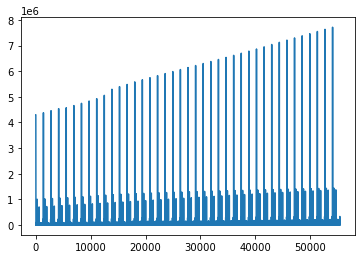

In [17]:
df['Population'].plot()

In [19]:
df.loc[df['Country'] == 'United States']

,Country,Energy_type,Year,Energy_consumption(quad Btu),Energy_production(quad Btu),GDP(Billions),Population,Energy_intensity_per_capita(MMBtu/person),Energy_intensity_by_GDP(1000 Btu/GDP),CO2_emission(MMtonnes)
1320,United States,all_energy_types,1980,78.021113,67.146595,7080.75,227119.0,343.525258,11.018764,4946.627130
1321,United States,coal,1980,15.422809,18.597725,7080.75,227119.0,343.525258,11.018764,1409.790188
1322,United States,natural_gas,1980,20.235459,19.907600,7080.75,227119.0,343.525258,11.018764,1081.593377
1323,United States,petroleum_n_other_liquids,1980,34.158965,20.473758,7080.75,227119.0,343.525258,11.018764,2455.243565
1324,United States,nuclear,1980,2.739169,2.739169,7080.75,227119.0,343.525258,11.018764,0.000000
...,...,...,...,...,...,...,...,...,...,...
55375,United States,coal,2019,11.315595,14.255763,19925.43,330043.8,304.305271,5.040497,1262.555409
55376,United States,natural_gas,2019,32.252007,35.187183,19925.43,330043.8,304.305271,5.040497,1626.410978
55377,United States,petroleum_n_other_liquids,2019,38.329386,31.910982,19925.43,330043.8,304.305271,5.040497,2388.226367
55378,United States,nuclear,2019,8.451852,8.451852,19925.43,330043.8,304.305271,5.040497,0.000000


<AxesSubplot:>

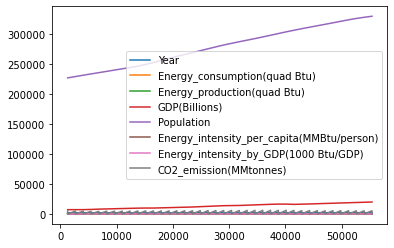

In [21]:
df.loc[df['Country'] == 'United States'].plot()

In [28]:
import sklearn.datasets as data
from sklearn.decomposition import PCA

In [24]:
df.keys()

Index(['Country', 'Energy_type', 'Year', 'Energy_consumption(quad Btu)',
       'Energy_production(quad Btu)', 'GDP(Billions)', 'Population',
       'Energy_intensity_per_capita(MMBtu/person)',
       'Energy_intensity_by_GDP(1000 Btu/GDP)', 'CO2_emission(MMtonnes)'],
      dtype='object')

In [26]:
featured_energy = ['Energy_consumption(quad Btu)',
       'Energy_production(quad Btu)', 'GDP(Billions)', 'Population',
       'Energy_intensity_per_capita(MMBtu/person)',
       'Energy_intensity_by_GDP(1000 Btu/GDP)', 'CO2_emission(MMtonnes)']
Energy_new_values = df.loc[:, featured_energy].values
Energy_new_values

array([[2.92899790e+02, 2.96337228e+02, 2.77709103e+04, ...,
        6.81459208e+01, 1.05470000e+01, 4.94662713e+03],
       [7.86561340e+01, 8.01141943e+01, 2.77709103e+04, ...,
        6.81459208e+01, 1.05470000e+01, 1.40979019e+03],
       [5.38652233e+01, 5.47610456e+01, 2.77709103e+04, ...,
        6.81459208e+01, 1.05470000e+01, 1.08159338e+03],
       ...,
       [5.54979345e-02, 0.00000000e+00, 3.76204000e+01, ...,
        1.15087012e+01, 4.48296160e+00, 4.37788994e+00],
       [           nan,            nan, 3.76204000e+01, ...,
        1.15087012e+01, 4.48296160e+00, 0.00000000e+00],
       [6.80892015e-02, 6.74992370e-02, 3.76204000e+01, ...,
        1.15087012e+01, 4.48296160e+00, 0.00000000e+00]])

In [39]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


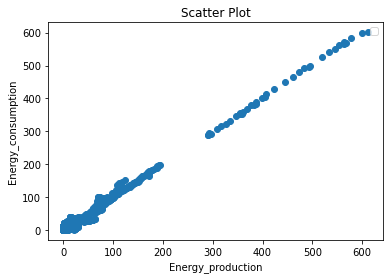

In [52]:
#plotting
plt.scatter(df['Energy_production(quad Btu)'], df['Energy_consumption(quad Btu)'])
plt.xlabel('Energy_production')
plt.ylabel('Energy_consumption')
plt.title('Scatter Plot')
plt.legend()
plt.show()

# Converting DataFrame files to other file types

In [ ]:
cz.to_csv(r'C:/Users/MY-PC/Documents/modified.csv') # Converts to csv file and saves in the provided file path

In [ ]:
cz.to_excel(r'C:/Users/MY-PC/Documents/modified.xlsx') # Converts to excel file and saves in the provided file path

In [ ]:
cz.to_json(r'C:/Users/MY-PC/Documents/modified.json') # Converts to json file and saves in the provided file path

In [ ]:
cz.to_html(r'C:/Users/MY-PC/Documents/modified.html') # Converts to html file and saves in the provided file path

In [ ]:
cz.to_sql(r'C:/Users/MY-PC/Documents/modified.sql') # Converts to sql file and saves in the provided file path

# THANK YOU 👍👍👍